<a href="https://colab.research.google.com/github/ZachPetroff/Babybot/blob/master/examples/Multiple_Sessions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code can be used to add a folder in the repository to the Python import
# path, irrespective of whether the notebook is being run in colab or Jupyter.
# (C) 2020 Abe Leite, Indiana University Bloomington
# This code block is released under MIT license. Feel free to make use of
# this code in any projects so long as you reproduce this text.

import os
import sys
import subprocess

repo_URL = 'https://github.com/ZachPetroff/Babybot'
repo_name = repo_URL.split('/')[-1]
code_folder = ''

try:
  repo_path = subprocess.check_output('git rev-parse --show-toplevel', shell=True).decode().strip()
except subprocess.CalledProcessError:
  os.system(f'git clone {repo_URL} --depth 1')
  repo_path = os.path.abspath(repo_name)

code_path = os.path.join(repo_path, code_folder)
sys.path.append(code_path)
print(f'Loading code from {code_path}')

Loading code from /content/Babybot/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import main
import graph
import simulation

# Biological References (Rovee-Collier, et al. 1978)
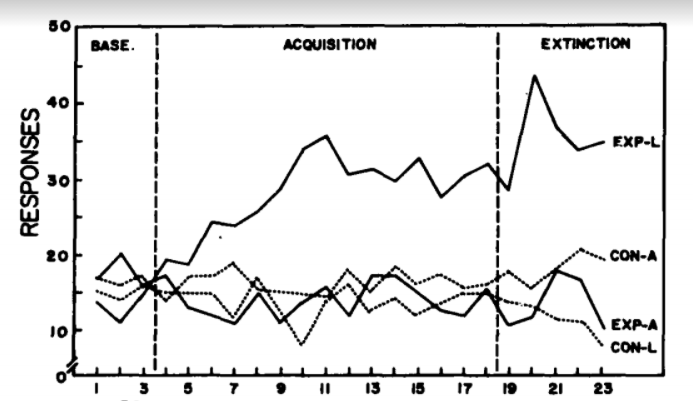
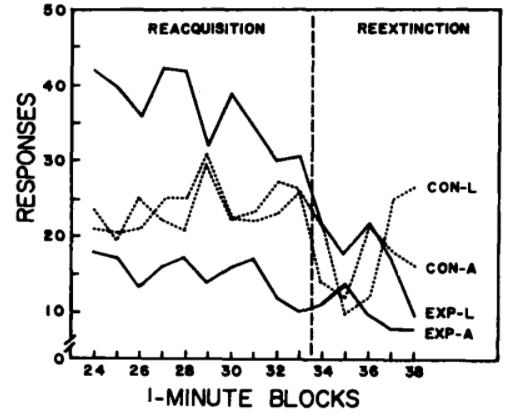

# Multiple Sessions
This notebook was created to explore how the two extinction-burst producing models perform over multiple sessions. From the biological data above, we can see that the models should decrease connected limb movements during re-aqcuisition and continue to decrease during re-extinction.

In [ ]:
reward = 6e-2 #@param
cost = 3e-2 #@param
num_sessions = 2 #@param

# simulate, while extracting key values
output = simulation.simulate(rates=[20, 20, 20, 20], num_sessions=num_sessions, reward=reward, cost=cost, mobile_on=True)

# list of extracted information
simulation.display_output(output)

## Mobile Dynamics

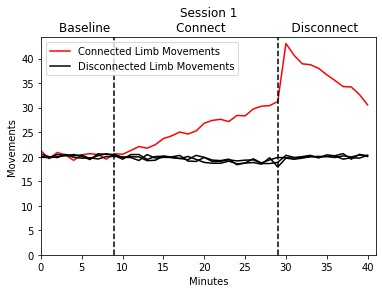

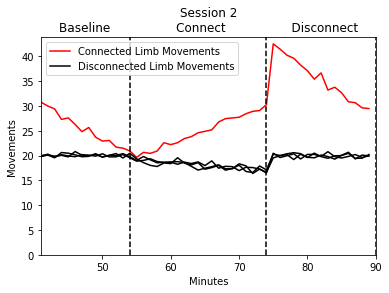

In [ ]:
graph.plot_movements(output["separations"], output["connection changes"], output["minutes"], output["right arm movements"], output["left arm movements"], output["right leg movements"], output["left leg movements"])

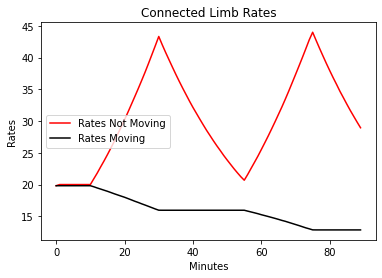

In [ ]:
graph.plot_rates(output["minutes"], output["still mobile rates"], output["moving mobile rates"])

## Violation of Expectation

In [ ]:
reward = .07 #@param
cost = .025 #@param
exp_growth = 2e-4 #@param
exp_decay = 5e-4 #@param

output = simulation.simulate(rates=[20, 20, 20, 20], num_sessions=2, reward=reward, cost=cost, expectation_growth=exp_growth, expectation_decay=exp_decay)

# list of accessible values
simulation.display_output(output)

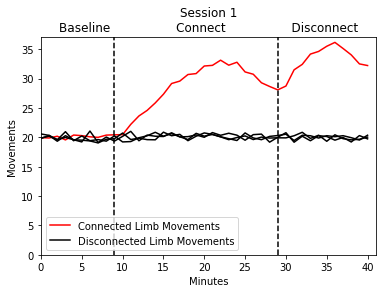

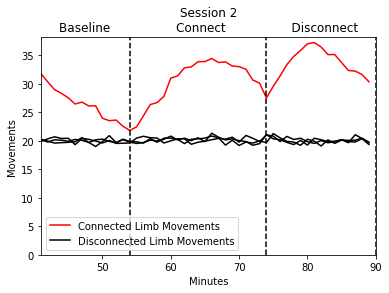

In [ ]:
graph.plot_movements(output["separations"], output["connection changes"], output["minutes"], output["right arm movements"], output["left arm movements"], output["right leg movements"], output["left leg movements"])

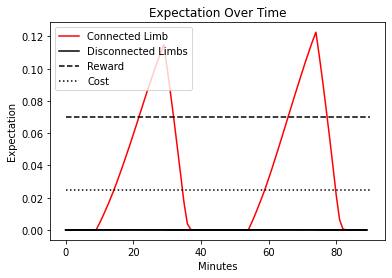

In [ ]:
graph.plot_expectation(output["minutes"], reward, cost, output["right arm expectations"], output["left arm expectations"], output["right leg expectations"], output["left leg expectations"])

# Discussion
From the Movements Over Time plots, we can see that the models do not mirror the biologicial data. Instead, they perform just as they did in the first session. In order to account for this, some sort of time-dependent parameter would likely have to be added. Possibly, the biological data could be explained by a lack of curiosity or boredom during the second session.